In [1]:
import sys
sys.path.append('..')

import torch
import torchvision.transforms as transforms
from src.utils.get_model_and_data import get_model_and_data
from src.utils.collate_fn_coco import collate_fn_coco

import clip

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parameters = {'device': 'cuda'}
model, datasets = get_model_and_data(parameters)

cat_texts = [v for k, v in datasets['train'].cats.items()]

loading annotations into memory...
Done (t=16.48s)
creating index...
index created!
loading annotations into memory...
Done (t=1.08s)
creating index...
index created!
train set scale: 21391
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
val set scale: 925


In [3]:
checkpoint = torch.load('../checkpoint/boxclip-finetune/checkpoint-epoch40.pth.tar')
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [4]:
dataloader = torch.utils.data.DataLoader(datasets['val'], batch_size=20, shuffle=True, collate_fn=collate_fn_coco)
batch = next(iter(dataloader))
for k, v in batch.items():
    if torch.is_tensor(v): batch[k] = batch[k].to('cuda')
        
model.eval()
with torch.no_grad():
    batch = model(batch)
out_cats = model.feat2cat(batch, cat_texts)

# [[cat_texts[j.item()] for j in i] for i in out_cats]

[['toilet', 'chair'],
 ['bear', 'bear'],
 ['bed', 'person'],
 ['dog', 'frisbee'],
 ['person', 'kite'],
 ['person', 'surfboard'],
 ['pizza', 'oven'],
 ['bench', 'potted plant'],
 ['fork', 'orange'],
 ['parking meter', 'bench'],
 ['cow', 'cow'],
 ['cell phone', 'person'],
 ['person', 'skateboard'],
 ['person', 'skateboard'],
 ['person', 'tennis racket'],
 ['parking meter', 'parking meter'],
 ['tie', 'person'],
 ['truck', 'truck'],
 ['person', 'tennis racket'],
 ['person', 'bench']]

In [5]:
# assert False

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

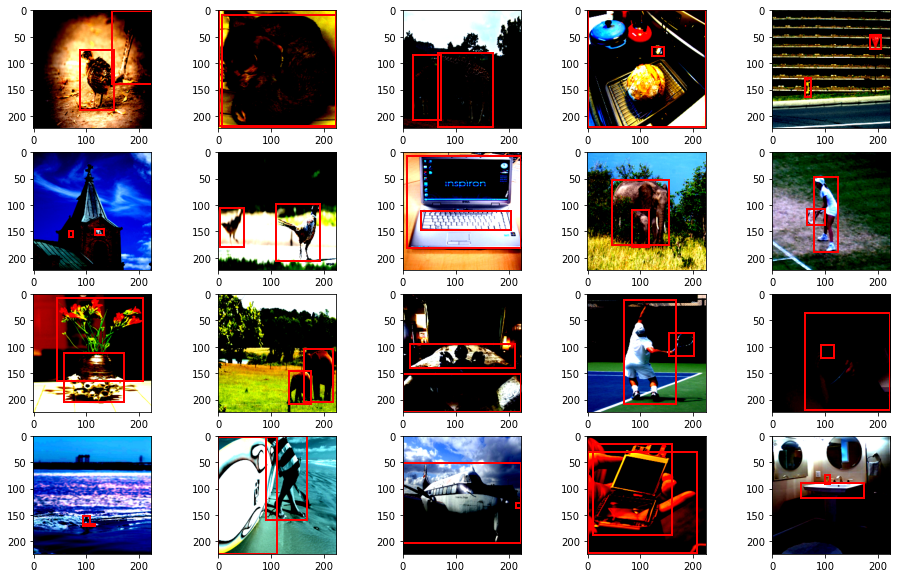

In [7]:
# show some data point
batch = next(iter(dataloader))

plt.figure(figsize=(16,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(batch['clip_images'][i].permute(1,2,0))
    for j in range(batch['bboxs'].shape[1]):
        [bbox_x, bbox_y, bbox_w, bbox_h] = batch['bboxs'][i][j]
        plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
                                          fill=False, edgecolor='r', linewidth=2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

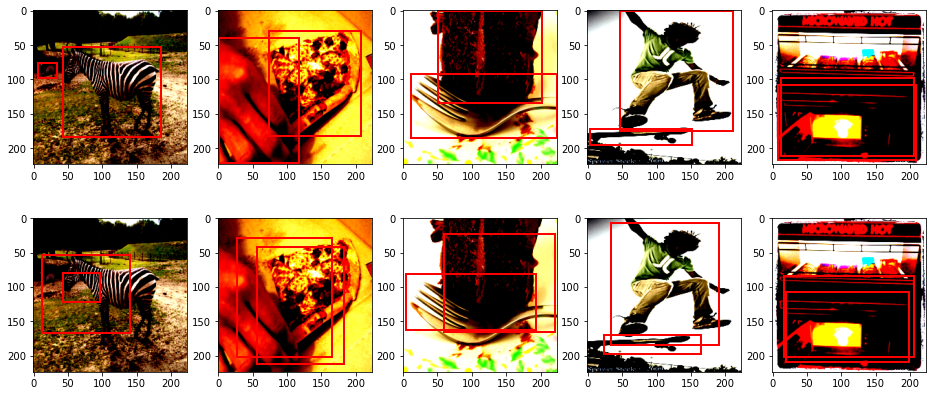

In [8]:
# reconstruction
batch = next(iter(dataloader))
for k, v in batch.items():
    if torch.is_tensor(v): batch[k] = batch[k].to('cuda')
        
num_img = 5
to_pil_image = transforms.ToPILImage()
plt.figure(figsize=(16, 7))

model.eval()
with torch.no_grad():
    batch = model(batch)
    out_cats = model.feat2cat(batch, cat_texts)
    out_cats = [[cat_texts[j.item()] for j in i] for i in out_cats]

# original bboxs
for num_img in range(5):
    plt.subplot(2, 5, num_img+1)
    plt.imshow(batch['clip_images'][num_img].cpu().permute(1,2,0))

    for j in range(batch['bboxs'].shape[1]):
        [bbox_x, bbox_y, bbox_w, bbox_h] = batch['bboxs'][num_img][j]
        plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
                                          fill=False, edgecolor='r', linewidth=2))
# output bboxs
for num_img in range(5):
    plt.subplot(2, 5, num_img+6)
    plt.imshow(batch['clip_images'][num_img].cpu().permute(1,2,0))

    for j in range(batch['output_bboxs'].shape[1]):
        [bbox_x, bbox_y, bbox_w, bbox_h] = batch['output_bboxs'][num_img][j].cpu()
        plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
                                          fill=False, edgecolor='r', linewidth=2))
    plt.title('\n'.join(out_cats[num_img]), color='white')
#         print(batch['output_cat'])

In [9]:
batch['z'].shape, batch['masks'].shape

(torch.Size([20, 512]), torch.Size([20, 2]))

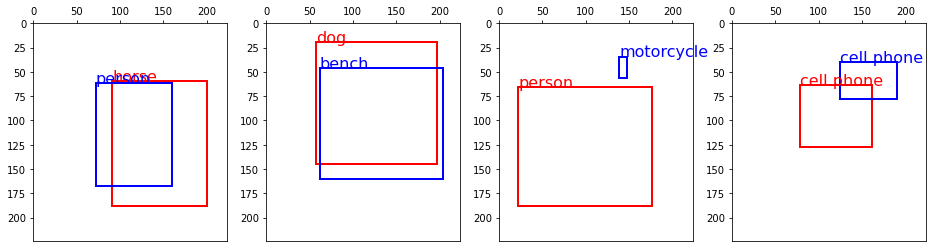

In [36]:
# text2bboxs

text = ['A men riding a horse.', 
        'A small dog under a table.', 
        'A cat playing with a dog.', 
        'A cell phone that is on the table']

text = clip.tokenize(text).to('cuda')
text_feats = model.clip_model.encode_text(text).float()

model.eval()
with torch.no_grad():
    batch = model.generate(text_feats)
    
    out_cats = model.feat2cat(batch, cat_texts)
    out_cats = [[cat_texts[j.item()] for j in i] for i in out_cats]


plt.figure(figsize=(16, 4))
color = ('r', 'b')
for num_img in range(4):
    plt.subplot(1,4,num_img+1)

    plt.xlim(0, 224)
    plt.ylim(0, 224)
    
    plt.gca().xaxis.set_ticks_position('top') #将x轴的位置设置在顶部
    plt.gca().invert_yaxis()
#     plt.gca().invert_yaxis()
#     plt.gca().invert_yaxis()
    

    
    for j in range(batch['output_bboxs'].shape[1]):
        [bbox_x, bbox_y, bbox_w, bbox_h] = batch['output_bboxs'][num_img][j].cpu()
        plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
                                          fill=False, edgecolor=color[j], linewidth=2))
        plt.text(bbox_x*224, bbox_y*224, out_cats[num_img][j], color=color[j], size=16)
#     plt.title('\n'.join(out_cats[num_img]), color='white')

In [ ]:
# image2bboxs
